In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import RegularPolygon
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd
import utils.datautils as datautils
import os

In [3]:
data_path = '/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211011_P37_N1_sB.csv'
save_path = '/Users/aichah/Desktop/TLI/data/tli_cols/'
save_name = '211011_P37_N1_T57.png'
plot_age = 57

if save_path[-1] != '/':
    save_path += '/'

In [4]:
temp_df = pd.read_csv(data_path, sep=';', index_col=0)
subset = temp_df[temp_df.timepoints ==plot_age]
del subset['timepoints']
data = {col:float(subset[col]) for col in subset}
data = {col:val for col,val in data.items() if val!=0}
data

{'0,0': 0.0032722271844384,
 '0,1': 0.002441090507881,
 '0,-1': 0.0001110838478576,
 '-1,-2': 0.0008510567294676,
 '1,1': 1.7520038544084796e-05,
 '-1,-1': 0.0014596163375097,
 '-1,0': 0.0005115198373552,
 '-2,-2': 0.0001155908118667}

In [4]:
#give the columns occupancy values, save_path and save_name for the plot
col_value = {'0,0': 0.0,
                '0,-1': 0.0,
                '0,1': 0.0,
                '1,0': 0.0,
                '1,-1': 0.0,
                '1,1': 0,
                '1,2': 0.0,
                '-1,0': 0,
                '-1,-1': 0.0,
                '-1,1': 0.0}
for col,val in data.items():
        col_value[col] = val
max = max(col_value.values())
col_value = {col:val for col,val in col_value.items() if val !=0}
col_value['1,0'] = 0.0
col_value = {col:val/max for col,val in col_value.items()}
col_value

{'0,0': 1.0,
 '0,-1': 0.03394747418085059,
 '0,1': 0.746002759065751,
 '1,1': 0.005354163252296217,
 '-1,0': 0.1563216147667908,
 '-1,-1': 0.4460620413066486,
 '-1,-2': 0.2600848539841416,
 '-2,-2': 0.03532481253636991,
 '1,0': 0.0}

In [5]:
#These are values not to be changed
r_ = [2,3] # give two numbers for definning the radius

col_coor = {'0,0': [0,0],
            '0,1': [0,2],
            '-1,0': [-1,1],
            '-1,-1': [-1,-1],
            '0,-1': [0,-2],
            '1,1': [1,1],
            '1,0': [1,-1], #until here is the inner ring
            '0,2': [0,4],
            '0,-2': [0,-4],
            '1,2': [1,3],
            '1,-1': [1,-3],
            '2,0': [2,-2],
            '-1,-2': [-2,-2],
            '-2,-2': [-3,-3]}

col_coor1 = {col:val for col,val in col_coor.items() if col in col_value.keys()}
col_coor1['1,0'] = [1,-1]

data = {'col' : col_coor1.keys(),'coor' : col_coor1.values()}
col_coor1 = pd.DataFrame(data=data)
col_coor1

,col,coor
0,"0,0","[0, 0]"
1,"0,1","[0, 2]"
2,"-1,0","[-1, 1]"
3,"-1,-1","[-1, -1]"
4,"0,-1","[0, -2]"
5,"1,1","[1, 1]"
6,"1,0","[1, -1]"
7,"-1,-2","[-2, -2]"
8,"-2,-2","[-3, -3]"


In [6]:
## define the boundaries for the colormap (values and colors)
# color_bound = {0:'blue', 0.5:'yellow', 1:'red'}
# cmap = colors.ListedColormap(color_bound.values())
# norm = colors.BoundaryNorm(list(color_bound.keys()), cmap.N)

vmin, vmax= 0, 1
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
p = plt.get_cmap('hot_r')

In [1]:
# plotting the column occupancy numbers
# you might  want to change some styling parameters
# the last line is for saving the plot
fig, ax = plt.subplots(1)
ax.set_aspect('equal')

# col_color = {'0,0': '#377eb8',
#         '0,-1': '#984ea3',
#         '0,1': '#ff7f00',
#         '1,0': '#4daf4a',
#         '1,1': '#999999',
#         '1,2': '#e41a1c',
#         '-1,0': '#a65628',
#         '-1,-1': '#f781bf'}

for index, row in col_coor1.iterrows():
        coor = row[1]
        X = coor[0]
        Y = r_[0] * np.sin(np.radians(60)) * (coor[1]) /r_[1]
        hexagon = RegularPolygon((X,Y), orientation = np.radians(30), 
                                numVertices=6, radius=r_[0]/r_[1], 
                                facecolor='k',
                                alpha=0.1, 
                                linewidth=2,
                                edgecolor='k')
        try:
                color = p(col_value[row[0]])
        except:
                color = p(0)
        circle = plt.Circle((X,Y), np.sqrt(1/10), 
                                facecolor=color, alpha=1, edgecolor="k", linewidth=0.5)
                                # linewidth=3, edgecolor='k')
        if row[0] in col_value.keys():
                ax.add_patch(hexagon)
                ax.add_patch(circle)
                ax.text(X, Y + 0.45, row[0], ha ='center',
                        va ='center', size = 12, color='blue') #adding col_name
                val_str = '%.2f' % col_value[row[0]]
                ax.text(X, Y - 0.45, val_str, ha ='center',
                        va ='center', size = 12, color='k')
plt.autoscale(enable = True)
sns.despine(left=True, bottom=True)
plt.tick_params(# axis='x', # changes apply to the x-axis
                which='both', # both major and minor ticks are affected
                bottom=False, # ticks along the bottom edge are off
                left=False,
                labelbottom=False,
                labelleft=False) # labels along the bottom edge are off
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=p), ax=ax)
# plt.plot([0,0], [0,4])
# plt.plot([0,3.5], [0,-2])
plt.plot([0,0],[0,2.5],c='w',alpha=0)
plt.plot([0,2.5],[0,0],c='w',alpha=0)
### saving the plot
plt.savefig(save_path+save_name, bbox_inches='tight')

NameError: name 'plt' is not defined

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import RegularPolygon
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd
import utils.datautils as datautils
import os

In [43]:
data_path = '/Users/aichah/Desktop/TLI/data/tli_cols/sA/'
save_path = '/Users/aichah/Desktop/TLI/data/tli_cols/'

# getting a list of the single csv output files
output_files = datautils.get_file_names(data_path, group_by='st_3Dpx_', order=True, nested_files=False, criteria='.csv')
# output_files

neu_types = {}
for neu in output_files:
    name = os.path.basename(neu)
    neu_type = name[name.find('_s'):name.find('.csv')][2:]
    name = os.path.basename(name[:name.find('.csv')])
    neu_types[name] = neu_type
neu_types1 = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types1 = pd.DataFrame(neu_types1)

# creating a dataframe with 1 column of timepoints
timepoints = {'timepoints':np.arange(36,58,0.25)}

first 5 files
['/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211121_P36.5_N2_sA.csv', '/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211121_P36.5_N1_sA.csv', '/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211114_P36_N2_sA.csv', '/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211114_P36_N1_sA.csv', '/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211113_P36_N2_sA.csv']


In [44]:
# del output_files[3]
output_files

['/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211121_P36.5_N2_sA.csv',
 '/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211121_P36.5_N1_sA.csv',
 '/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211114_P36_N2_sA.csv',
 '/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211114_P36_N1_sA.csv',
 '/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211113_P36_N2_sA.csv',
 '/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211107_P36_N1_sA.csv',
 '/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211104_P36_N2_sA.csv',
 '/Users/aichah/Desktop/TLI/data/tli_cols/sA/st_3Dpx_211011_P37_N1_sB.csv']

In [45]:
file = output_files[0]
neu_name = os.path.basename(file[:file.find('.csv')])
ref_df  = pd.read_csv(file, sep=';', usecols = ['timepoints', '0,0'])
ref_df = ref_df.rename(columns={'0,0':neu_name})
for file in output_files[1:]:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=';', usecols = ['timepoints', '0,0']) 
    temp_df = temp_df.rename(columns={'0,0':neu_name})
    ref_df = pd.merge(ref_df, temp_df, on='timepoints')

In [46]:
standard = {} 
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=';', usecols = ['0,0'])
    standard[neu_name] = temp_df.loc[80][0]
standard

{'st_3Dpx_211121_P36.5_N2_sA': 0.0030437461491065,
 'st_3Dpx_211121_P36.5_N1_sA': 0.0035490552097088,
 'st_3Dpx_211114_P36_N2_sA': 0.001959759602822,
 'st_3Dpx_211114_P36_N1_sA': 0.002679007491463,
 'st_3Dpx_211113_P36_N2_sA': 0.0039227318610063,
 'st_3Dpx_211107_P36_N1_sA': 0.0041016513907087,
 'st_3Dpx_211104_P36_N2_sA': 0.0033821326695815,
 'st_3Dpx_211011_P37_N1_sB': 0.0032722271844384}

In [47]:
col_av = {'0,0': 0.0,
                '0,-1': 0.0,
                '0,1': 0.0,
                '1,0': 0.0,
                '1,1': 0,
                '1,2': 0.0,
                '-1,0': 0,
                '-1,-1': 0.0}

In [7]:
for col in col_av.keys():
    work_standard = {}
    collective_results = pd.DataFrame(timepoints)
    # empty_df = pd.read_csv(output_files[0], sep=';', usecols = ['timepoints'])
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('.csv')])
        try:
            for i in [1]:
                temp_df = pd.read_csv(file, sep=';', usecols = ['timepoints', col])
                temp_df = temp_df.rename(columns={col:neu_name})
        except:
            pass
            # for i in [1]:
            #     col = '0,0'
            #     temp_df = pd.read_csv(file, sep=';', usecols = ['timepoints', col])
                # temp_df[col] = temp_df[col] - temp_df[col]
        try:
            if temp_df.loc[80,neu_name]/standard[neu_name] > 0.15:
                collective_results = pd.merge(collective_results, temp_df, on='timepoints')
                work_standard[neu_name] = standard[neu_name]
        except:
            pass
    collective_results.loc[:, collective_results.columns != 'timepoints'] = collective_results.loc[:, collective_results.columns != 'timepoints']/list(work_standard.values())
        # collective_results = collective_results.loc[:, collective_results.columns != 'timepoints']/list(standard.values())
    #     collective_results.loc[:, collective_results.columns != 'timepoints'] = collective_results.loc[:, collective_results.columns != 'timepoints'].div(list(standard.values()))
    print(col, len(collective_results.columns)-1)
    col_std = collective_results.loc[:, collective_results.columns != 'timepoints'].std(axis=1)
    col_mean = collective_results.loc[:, collective_results.columns != 'timepoints'].mean(axis=1)
    col_av[col] = {'mean':col_mean, 'std':col_std}

0,0 7
0,-1 5
0,1 6
1,0 5
1,1 6
1,2 3
-1,0 0
-1,-1 0


In [9]:
for col in col_av.keys():
    collective_results = pd.DataFrame(timepoints)
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('.csv')])
        try:
            for i in [1]:
                temp_df = pd.read_csv(file, sep=';', usecols = ['timepoints', col])
                temp_df = temp_df.rename(columns={col:neu_name})
        except:
            pass
        try:
            if temp_df.loc[80,neu_name]/standard[neu_name] > 0.15:
                collective_results = pd.merge(collective_results, temp_df, on='timepoints')
                # work_standard[neu_name] = standard[neu_name]
        except:
            pass
        # collective_results = pd.merge(collective_results, temp_df, on='timepoints')
        collective_results.loc[:, collective_results.columns != 'timepoints'] = collective_results.loc[:, collective_results.columns != 'timepoints'].div(collective_results.loc[80, collective_results.columns != 'timepoints'])
    print(col, len(collective_results.columns)-1)
    col_std = collective_results.loc[:, collective_results.columns != 'timepoints'].std(axis=1)
    col_mean = collective_results.loc[:, collective_results.columns != 'timepoints'].mean(axis=1)
    col_av[col] = {'mean':col_mean, 'std':col_std}


NameError: name 'col_av' is not defined

In [48]:
output_cols = ['neuron', 'all','0.01-0.249','0.25-0.49','0.5-.749','0.75-1','>1']
# results = []
output_AB = []
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=';')
    temp_df = temp_df.loc[80,temp_df.columns != 'timepoints']
    temp_df = temp_df[1:]
    temp_df = temp_df/temp_df.max()
    temp_df = temp_df[temp_df>0].round(decimals=3)
    less_quar = len(temp_df[temp_df<0.25])
    lower_mid = len(temp_df[(temp_df>0.249) & (temp_df<0.5)])
    higher_mid = len(temp_df[(temp_df>0.499) & (temp_df<0.75)])
    upper_quantil = len(temp_df[(temp_df>0.749) & (temp_df<1.001)])
    more_one = len(temp_df[temp_df>1])
    output_AB.append([neu_name,len(temp_df),less_quar,lower_mid,higher_mid,upper_quantil,more_one])
output_AB = pd.DataFrame(output_AB, columns=output_cols)
output_AB = output_AB.drop(['>1'], axis=1)

In [49]:
output_AB

,neuron,all,0.01-0.249,0.25-0.49,0.5-.749,0.75-1
0,st_3Dpx_211121_P36.5_N2_sA,8,4,1,1,2
1,st_3Dpx_211121_P36.5_N1_sA,8,6,1,0,1
2,st_3Dpx_211114_P36_N2_sA,11,4,4,0,3
3,st_3Dpx_211114_P36_N1_sA,9,4,2,2,1
4,st_3Dpx_211113_P36_N2_sA,9,4,3,0,2
5,st_3Dpx_211107_P36_N1_sA,6,3,1,0,2
6,st_3Dpx_211104_P36_N2_sA,8,4,2,0,2
7,st_3Dpx_211011_P37_N1_sB,8,4,2,1,1


In [50]:
data_path = '/Users/aichah/Desktop/TLI/data/tli_cols/sC_D/'
save_path = '/Users/aichah/Desktop/TLI/data/tli_cols/'

# getting a list of the single csv output files
output_files = datautils.get_file_names(data_path, group_by='st_3Dpx_', order=True, nested_files=False, criteria='.csv')
# output_files

neu_types = {}
for neu in output_files:
    name = os.path.basename(neu)
    neu_type = name[name.find('_s'):name.find('.csv')][2:]
    name = os.path.basename(name[:name.find('.csv')])
    neu_types[name] = neu_type
neu_types1 = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types1 = pd.DataFrame(neu_types1)

# creating a dataframe with 1 column of timepoints
timepoints = {'timepoints':np.arange(36,58,0.25)}
del output_files[3]
file = output_files[0]
neu_name = os.path.basename(file[:file.find('.csv')])
ref_df  = pd.read_csv(file, sep=';', usecols = ['timepoints', '0,0'])
ref_df = ref_df.rename(columns={'0,0':neu_name})
for file in output_files[1:]:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=';', usecols = ['timepoints', '0,0']) 
    temp_df = temp_df.rename(columns={'0,0':neu_name})
    ref_df = pd.merge(ref_df, temp_df, on='timepoints')
standard = {} 
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=';', usecols = ['0,0'])
    standard[neu_name] = temp_df.loc[80][0]
output_CD = []
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=';')
    temp_df = temp_df.loc[80,temp_df.columns != 'timepoints']
    temp_df = temp_df[1:]
    temp_df = temp_df/temp_df.max()
    temp_df = temp_df[temp_df>0].round(decimals=3)
    less_quar = len(temp_df[temp_df<0.25])
    lower_mid = len(temp_df[(temp_df>0.249) & (temp_df<0.5)])
    higher_mid = len(temp_df[(temp_df>0.499) & (temp_df<0.75)])
    upper_quantil = len(temp_df[(temp_df>0.749) & (temp_df<1.001)])
    more_one = len(temp_df[temp_df>1])
    output_CD.append([neu_name,len(temp_df),less_quar,lower_mid,higher_mid,upper_quantil,more_one])
output_CD = pd.DataFrame(output_CD, columns=output_cols)
output_CD = output_CD.drop(['>1'], axis=1)


first 5 files
['/Users/aichah/Desktop/TLI/data/tli_cols/sC_D/st_3Dpx_220209_P36_N1_sC.csv', '/Users/aichah/Desktop/TLI/data/tli_cols/sC_D/st_3Dpx_220127_P36_N1_sC.csv', '/Users/aichah/Desktop/TLI/data/tli_cols/sC_D/st_3Dpx_211121_P36.5_N3_sC.csv', '/Users/aichah/Desktop/TLI/data/tli_cols/sC_D/st_3Dpx_211114_P36_N3_sC.csv', '/Users/aichah/Desktop/TLI/data/tli_cols/sC_D/st_3Dpx_211113_P36_N1_sC.csv']


In [51]:
# output_CD = output_CD.drop([1])
output_CD

,neuron,all,0.01-0.249,0.25-0.49,0.5-.749,0.75-1
0,st_3Dpx_220209_P36_N1_sC,7,3,1,1,2
1,st_3Dpx_220127_P36_N1_sC,4,2,0,0,2
2,st_3Dpx_211121_P36.5_N3_sC,8,4,3,0,1
3,st_3Dpx_211113_P36_N1_sC,7,3,0,3,1
4,st_3Dpx_211107_P36_N3_sC,6,4,1,0,1
5,st_3Dpx_211107_P36_N2_sC,7,5,1,0,1
6,st_3Dpx_211104_P36_N3_sC,10,5,2,1,2
7,st_3Dpx_211104_P36_N1_sC,8,3,3,0,2


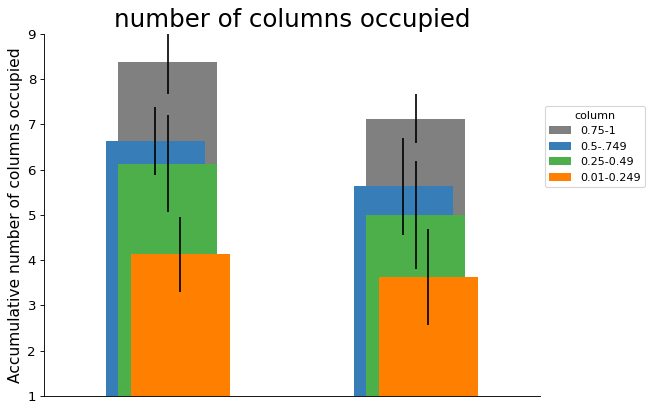

In [53]:
# ax = output_AB.plot.bar(x=1,y=output_AB.loc[:,output_AB.columns != 'neuron'].mean(), rot=0)
AB_col_count = np.cumsum(output_AB.loc[:,'0.01-0.249':'0.75-1'].mean())
AB_col_count_std = list(output_AB.loc[:,'0.01-0.249':'0.75-1'].std())
CD_col_count = np.cumsum(output_CD.loc[:,'0.01-0.249':'0.75-1'].mean())
CD_col_count_std = list(output_CD.loc[:,'0.01-0.249':'0.75-1'].std())
labels = output_CD.loc[:,'0.01-0.249':'0.75-1'].columns
seq = np.arange(-1,-5,-1)
x_pos = np.array([0.9,1.1,1,0.9,1])
colors = ['#984ea3','#ff7f00','#4daf4a','#377eb8','gray']

plt.figure(figsize=(8, 6), dpi=80)
for i in seq:
    plt.bar(x_pos[i], AB_col_count[i], color=colors[i], yerr=AB_col_count_std[i], label=labels[i])
    plt.bar(x_pos[i]+2, CD_col_count[i], color=colors[i], yerr=CD_col_count_std[i])

plt.legend(bbox_to_anchor=(1.01,.8), loc=2, borderaxespad=0., prop={'size': 10}, title='column')
plt.title('number of columns occupied', fontsize=22)
plt.ylabel('Accumulative number of columns occupied', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(2,9)
plt.xlim(0,4)
y_range = list(np.arange(1,10,1))
sns.despine()
plt.yticks(y_range)
plt.tick_params(
axis='x', # changes apply to the x-axis
which='both', # both major and minor ticks are affected
bottom=False, # ticks along the bottom edge are off
top=False, # ticks along the top edge are off
labelbottom=False) # labels along the bottom edge are off
fig_name = save_path+'number_cols_occupied_1.pdf'
plt.savefig(fig_name, bbox_inches='tight')

In [32]:
# del col_av['1,2']
# del col_av['-1,-1']
# del col_av['0,-1']

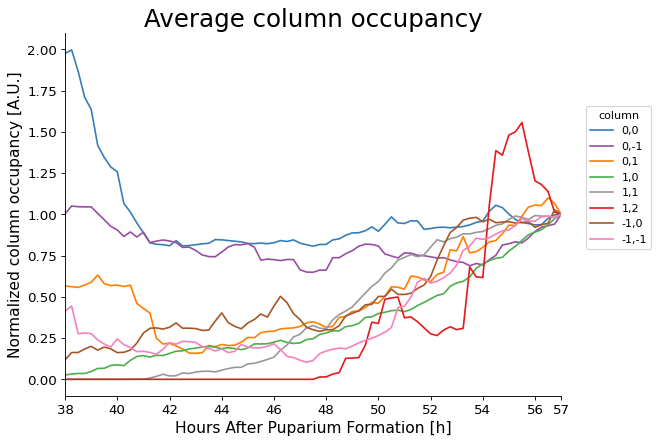

In [12]:

col_color = {'0,0': '#377eb8',
        '0,-1': '#984ea3',
        '0,1': '#ff7f00',
        '1,0': '#4daf4a',
        '1,1': '#999999',
        '1,2': '#e41a1c',
        '-1,0': '#a65628',
        '-1,-1': '#f781bf'}
plot_start = 1
# '#377eb8', '#ff7f00', '#4daf4a',
#                   '#f781bf', '#a65628', '#984ea3',
#                   '#999999', '#e41a1c', '#dede00'
plt.figure(figsize=(8, 6), dpi=80)
for col,val in col_av.items():
    plt.plot(collective_results.loc[plot_start:80,'timepoints'], 
            val['mean'][plot_start:81],c=col_color[col],label=col)
    # min_val = val['mean'][6:81] - 1*val['std'][6:81]
    # max_val = val['mean'][6:81] + 1*val['std'][6:81]
    # plt.fill_between(collective_results.loc[6:80,'timepoints'], min_val, max_val,alpha=.1)
plt.legend(bbox_to_anchor=(1.05,.8), loc=2, borderaxespad=0., prop={'size': 10}, title='column')
plt.title('Average column occupancy', fontsize=22)
plt.ylabel('Normalized column occupancy [A.U.]', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
# plt.ylim(0.5,1)
plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
sns.despine()
plt.xticks(x_range1)
plt.xlabel("Hours After Puparium Formation [h]", fontsize=14)
fig_name = save_path+'avg_col_occ_sA_norAllat57_July_30.pdf'
# plt.savefig(fig_name, bbox_inches='tight')

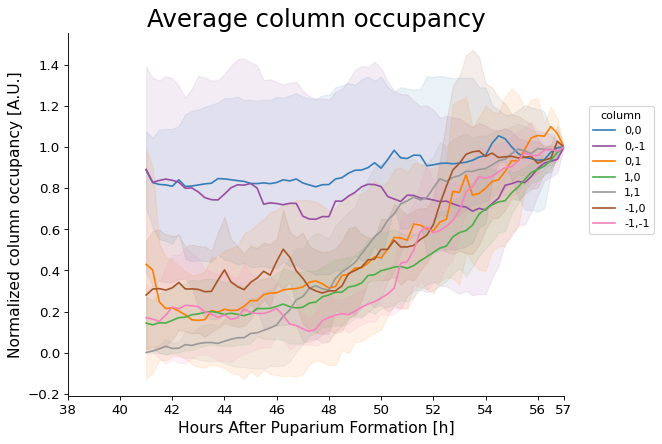

In [17]:
subset = col_av.copy()
# del subset['0,-1']
# del subset['1,1']
# del subset['-1,0']
# del subset['-1,-1']
# del subset['1,0']
del subset['1,2']
plot_start = 16
plt.figure(figsize=(8, 6), dpi=80)
for col,val in subset.items():
    plt.plot(collective_results.loc[plot_start:80,'timepoints'], val['mean'][plot_start:81],
            c=col_color[col],label=col)
    min_val = val['mean'][plot_start:81] - 1*val['std'][plot_start:81]
    max_val = val['mean'][plot_start:81] + 1*val['std'][plot_start:81]
    plt.fill_between(collective_results.loc[plot_start:80,'timepoints'], min_val, 
                    max_val,alpha=.1,color=col_color[col])
plt.legend(bbox_to_anchor=(1.05,.8), loc=2, borderaxespad=0., prop={'size': 10}, title='column')
plt.title('Average column occupancy', fontsize=22)
plt.ylabel('Normalized column occupancy [A.U.]', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
# plt.ylim(0.5,1)
plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
sns.despine()
plt.xticks(x_range1)
plt.xlabel("Hours After Puparium Formation [h]", fontsize=14)
fig_name = save_path+'avg_col_occ_sC_norAllat57_July_41.pdf'
plt.savefig(fig_name, bbox_inches='tight')

In [31]:
len(collective_results.loc[:,'timepoints']), len(val['mean'][:])

(88, 82)

In [38]:
collective_results.loc[84,'timepoints']

57.0

In [ ]:
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=';', usecols = ['timepoints', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoints')